In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aapl-stock-data-daily/AAPL Daily with Technical Indicators.csv
/kaggle/input/aapl-stock-data-daily/AAPL Daily.csv


Data Source - ALPHA VANTAGE AND POLYGON

# **AAPL STOCK DAILY DATA WITH TECHNICAL INDICATORS**

1. Row count - 6018
2. Column count - 14
3. Window Size - 20
4. Epoch - 10

In [2]:
# Load your dataset
data = pd.read_csv('../input/aapl-stock-data-daily/AAPL Daily with Technical Indicators.csv')  # Make sure you replace 'your_dataset.csv' with the actual file name

# Extract features and target variable
X = data[['Open', 'High', 'Low', 'Volume','True Range','20 EMA','BB Upper','BB Mid','BB Lower','MACD','MACD Signal','MACD Histogram']].values
y = data['Close'].values  # Assuming you want to predict the 'Close' price

In [3]:
# Normalize the data (important for neural networks)
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y.reshape(-1, 1))

In [4]:
# Define sequence length (number of time steps to use for prediction)
sequence_length = 20  # Adjust this based on your data and problem

# Generate sequences
sequences = []
next_values = []
for i in range(len(X) - sequence_length):
    sequences.append(X[i:i+sequence_length])
    next_values.append(y[i+sequence_length])

X = np.array(sequences)
y = np.array(next_values)

In [5]:
# Split data into training and testing sets
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=2)

# Iterate over the splits to get train and test indices
for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]

for train_index, test_indec in tscv.split(y):
    y_train, y_test = y[train_index], y[test_index]

In [6]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu',return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(rate=0.2))
model.add(LSTM(50, activation='relu',return_sequences=True))
model.add(Dropout(rate=0.2))
model.add(LSTM(50, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=256)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values
y_pred = scaler_y.inverse_transform(y_pred)
y_test = scaler_y.inverse_transform(y_test)

Epoch 1/10
16/16 [==============================] - 6s 85ms/step - loss: 0.0019
Epoch 2/10
16/16 [==============================] - 2s 97ms/step - loss: 3.9566e-04
Epoch 3/10
16/16 [==============================] - 1s 83ms/step - loss: 1.9038e-04
Epoch 4/10
16/16 [==============================] - 1s 82ms/step - loss: 1.4031e-04
Epoch 5/10
16/16 [==============================] - 1s 80ms/step - loss: 1.2812e-04
Epoch 6/10
16/16 [==============================] - 1s 84ms/step - loss: 1.1272e-04
Epoch 7/10
16/16 [==============================] - 1s 80ms/step - loss: 9.9693e-05
Epoch 8/10
16/16 [==============================] - 1s 80ms/step - loss: 9.5634e-05
Epoch 9/10
16/16 [==============================] - 1s 80ms/step - loss: 8.6808e-05
Epoch 10/10
63/63 [==============================] - 1s 10ms/step - loss: 0.0038
Test Loss: 0.003813024377450347
63/63 [==============================] - 1s 9ms/step


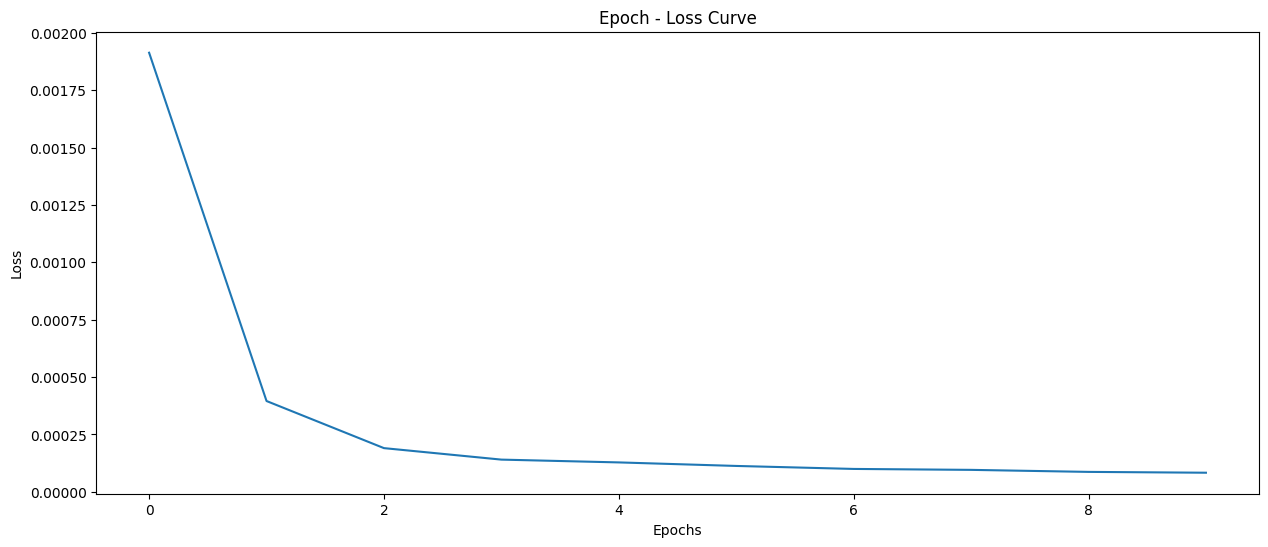

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.title('Epoch - Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [8]:
# Calculate any performance metrics or do further analysis as needed
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 8.65632541419318
Mean Squared Error (MSE): 146.80372643667252
Root Mean Squared Error (RMSE): 12.116258764019218


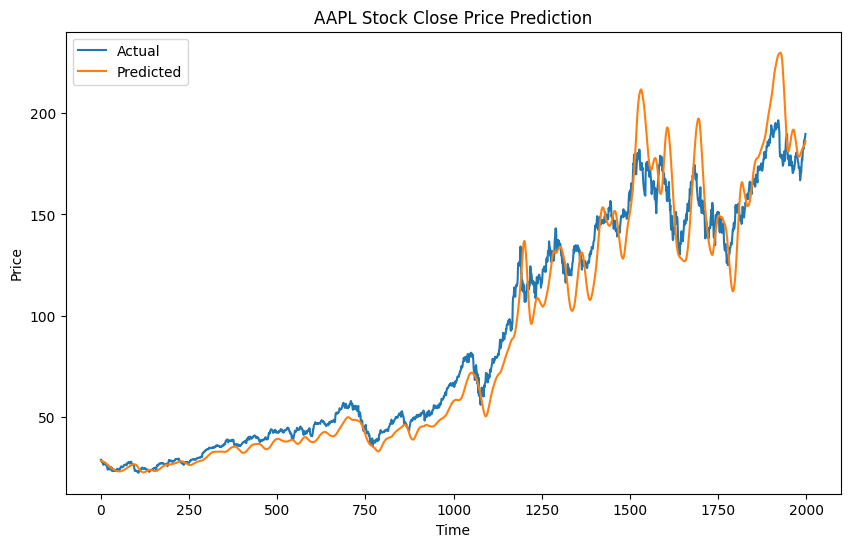

In [9]:
import matplotlib.pyplot as plt
# Plotting the results
plt.figure(figsize=(10, 6))

# Plot actual vs. predicted
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')

plt.title('AAPL Stock Close Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# **AAPL STOCK DAILY DATA**

1. Row Count - 6018
2. Column Count - 6
2. Window Size - 20
3. EPOCH - 10

In [10]:
# Load your dataset
data = pd.read_csv('../input/aapl-stock-data-daily/AAPL Daily.csv')  # Make sure you replace 'your_dataset.csv' with the actual file name

# Extract features and target variable
X = data[['Open', 'High', 'Low', 'Volume']].values
y = data['Close'].values  # Assuming you want to predict the 'Close' price

In [11]:
# Normalize the data (important for neural networks)
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y.reshape(-1, 1))

In [12]:
# Define sequence length (number of time steps to use for prediction)
sequence_length = 20  # Adjust this based on your data and problem

# Generate sequences
sequences = []
next_values = []
for i in range(len(X) - sequence_length):
    sequences.append(X[i:i+sequence_length])
    next_values.append(y[i+sequence_length])

X = np.array(sequences)
y = np.array(next_values)

In [13]:
# Split data into training and testing sets
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=2)

# Iterate over the splits to get train and test indices
for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]

for train_index, test_indec in tscv.split(y):
    y_train, y_test = y[train_index], y[test_index]

In [14]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu',return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(rate=0.2))
model.add(LSTM(50, activation='relu',return_sequences=True))
model.add(Dropout(rate=0.2))
model.add(LSTM(50, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size =256)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values
y_pred = scaler_y.inverse_transform(y_pred)
y_test = scaler_y.inverse_transform(y_test)

Epoch 1/10
16/16 [==============================] - 6s 87ms/step - loss: 0.0019
Epoch 2/10
16/16 [==============================] - 1s 83ms/step - loss: 4.1493e-04
Epoch 3/10
16/16 [==============================] - 1s 82ms/step - loss: 1.6678e-04
Epoch 4/10
16/16 [==============================] - 2s 99ms/step - loss: 1.3422e-04
Epoch 5/10
16/16 [==============================] - 1s 82ms/step - loss: 1.1815e-04
Epoch 6/10
16/16 [==============================] - 1s 82ms/step - loss: 1.0711e-04
Epoch 7/10
16/16 [==============================] - 1s 81ms/step - loss: 1.0583e-04
Epoch 8/10
16/16 [==============================] - 1s 80ms/step - loss: 8.4495e-05
Epoch 9/10
16/16 [==============================] - 1s 80ms/step - loss: 7.8257e-05
Epoch 10/10
63/63 [==============================] - 1s 9ms/step - loss: 0.0075
Test Loss: 0.007523766718804836
63/63 [==============================] - 1s 9ms/step


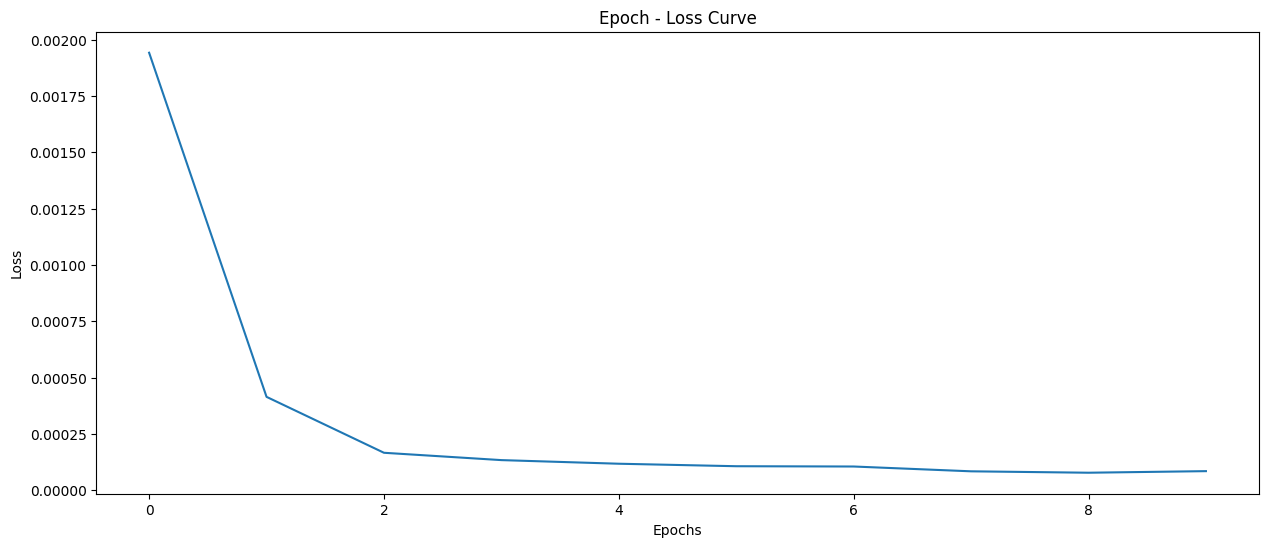

In [15]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.title('Epoch - Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [16]:
# Calculate any performance metrics or do further analysis as needed
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 10.503727306495898
Mean Squared Error (MSE): 289.6695145174329
Root Mean Squared Error (RMSE): 17.01968021196147


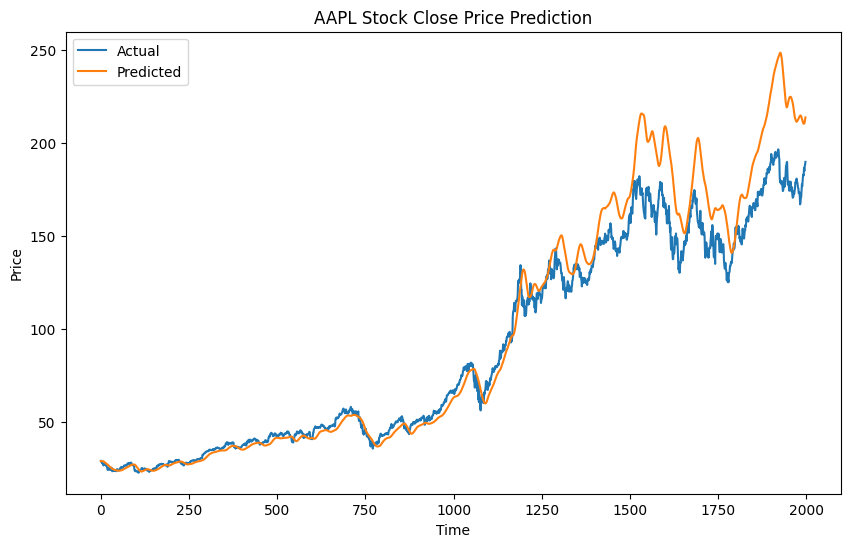

In [17]:
import matplotlib.pyplot as plt
# Plotting the results
plt.figure(figsize=(10, 6))

# Plot actual vs. predicted
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')

plt.title('AAPL Stock Close Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# **AAPL DAILY DATA USING LOG AS STANDARDIZATION**

In [18]:
# Load your dataset
data = pd.read_csv('../input/aapl-stock-data-daily/AAPL Daily.csv')  # Make sure you replace 'your_dataset.csv' with the actual file name

# Extract features and target variable
X = data[['Open', 'High', 'Low', 'Volume']].values
y = data['Close'].values  # Assuming you want to predict the 'Close' price

In [19]:
# Normalize the data (important for neural networks)
X=np.log(X)
y=np.log(y.reshape(-1,1))

In [20]:
# Define sequence length (number of time steps to use for prediction)
sequence_length = 20  # Adjust this based on your data and problem

# Generate sequences
sequences = []
next_values = []
for i in range(len(X) - sequence_length):
    sequences.append(X[i:i+sequence_length])
    next_values.append(y[i+sequence_length])

X = np.array(sequences)
y = np.array(next_values)

In [21]:
# Split data into training and testing sets
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=2)

# Iterate over the splits to get train and test indices
for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]

for train_index, test_indec in tscv.split(y):
    y_train, y_test = y[train_index], y[test_index]

In [22]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu',return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(rate=0.2))
model.add(LSTM(50, activation='relu',return_sequences=True))
model.add(Dropout(rate=0.2))
model.add(LSTM(50, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size =256)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values
y_pred = np.exp(y_pred)
y_test = np.exp(y_test)

Epoch 1/10
16/16 [==============================] - 6s 85ms/step - loss: 2.8480
Epoch 2/10
16/16 [==============================] - 1s 81ms/step - loss: 0.3978
Epoch 3/10
16/16 [==============================] - 1s 80ms/step - loss: 0.2026
Epoch 4/10
16/16 [==============================] - 1s 81ms/step - loss: 0.1428
Epoch 5/10
16/16 [==============================] - 1s 81ms/step - loss: 0.1172
Epoch 6/10
16/16 [==============================] - 1s 85ms/step - loss: 0.1042
Epoch 7/10
16/16 [==============================] - 1s 82ms/step - loss: 0.0956
Epoch 8/10
16/16 [==============================] - 1s 82ms/step - loss: 0.0910
Epoch 9/10
16/16 [==============================] - 1s 81ms/step - loss: 0.0885
Epoch 10/10
63/63 [==============================] - 1s 9ms/step - loss: 1.1468
Test Loss: 1.1468076705932617
63/63 [==============================] - 1s 9ms/step


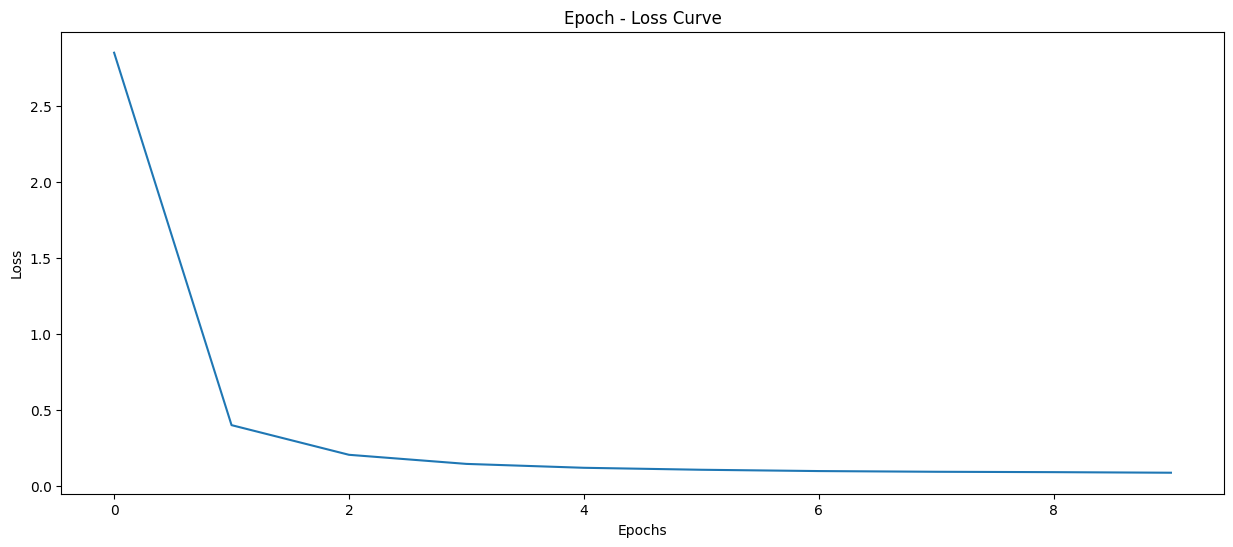

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.title('Epoch - Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [24]:
# Calculate any performance metrics or do further analysis as needed
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 61.39046403287733
Mean Squared Error (MSE): 5919.399056219738
Root Mean Squared Error (RMSE): 76.93763095013868


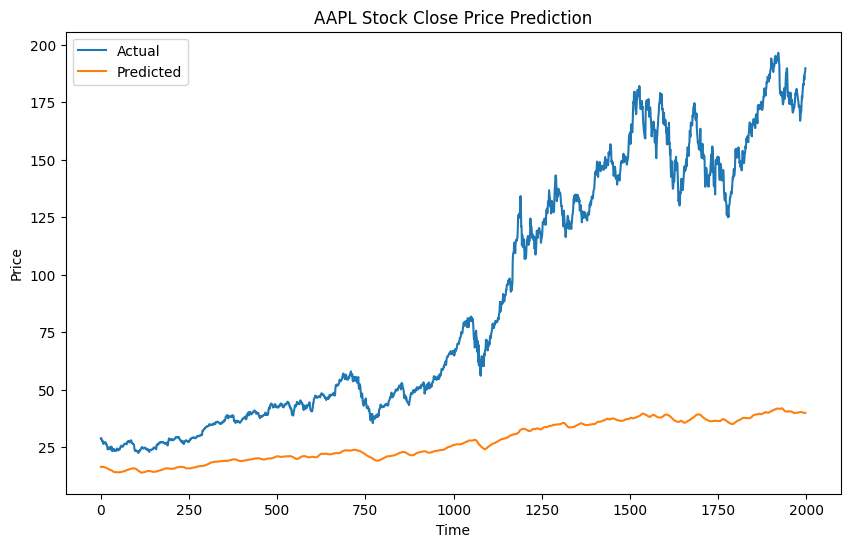

In [25]:
import matplotlib.pyplot as plt
# Plotting the results
plt.figure(figsize=(10, 6))

# Plot actual vs. predicted
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')

plt.title('AAPL Stock Close Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()